# Installing Libraries

In [ ]:
!pip install librosa
!pip install python_speech_features
!pip install os
!pip install matplotlib
!pip install tqdm
!pip install scikit-learn

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import python_speech_features as mf

E:\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Defining Variables

In [2]:

audio_dataset_path=r"D:\FYP\FYP_class\FULLDATA"
metadata=pd.read_csv(r"D:\FYP\FYP_class\fulldata.csv",names = ['file','fold','label'])

# Functions For Feature Extraction

In [3]:
def feature_1(file):
    audio,sr = librosa.load(file)
    zcr = librosa.zero_crossings(audio)
    zcr = sum(zcr)
    data = pd.DataFrame([zcr],columns=['A'])
    return data

def feature_2(file):
    audio,sr = librosa.load(file)
    
    #mfcc=np.mean(librosa.feature.mfcc(audio,sr = sr,n_mfcc=12).T,axis=0)


    mfcc_feature =np.mean(mf.mfcc(audio,sr, 0.025, 0.01,12,nfft = 1200, appendEnergy = True),axis = 0)     
    #mfcc_feature = preprocessing.scale(mfcc_feature)
    mfcc = pd.DataFrame(mfcc_feature)
    #df1 = pd.DataFrame(mfcc)
    #df1 = df1.T
    mfcc = mfcc.T
    return mfcc

def feature_3(file):
    audio,sr = librosa.load(file)
    chromagram =np.mean(librosa.feature.chroma_stft(audio, sr=sr, hop_length=512),axis=1) 
    
    
    
    cr = pd.DataFrame(chromagram)
    #df1 = pd.DataFrame(mfcc)
    #df1 = df1.T
    cr = cr.T
    return cr

# Performing Feature Extraction and Creating Data Frame

In [4]:

data_1 = pd.DataFrame()
data_2 = pd.DataFrame()
data_3 = pd.DataFrame()
#parser function works!!!!!
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["file"]))
    temp_1 = feature_1(file_name)
    temp_2 = feature_2(file_name)
    temp_3 = feature_3(file_name)
    data_1 = data_1.append(temp_1)
    data_2 = data_2.append(temp_2)
    data_3 = data_3.append(temp_3)

0it [00:00, ?it/s]C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\3752182985.py:24: FutureWarning: Pass y=[ 1.4802503e-06  8.1664245e-07 -8.3492654e-07 ... -1.3083821e-03
 -9.9923648e-04 -4.9700466e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram =np.mean(librosa.feature.chroma_stft(audio, sr=sr, hop_length=512),axis=1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\585107859.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_1 = data_1.append(temp_1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\585107859.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2 = data_2.append(temp_2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20212\585107859.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pan

# Concatenating Dataframes

In [12]:
result = pd.concat([ data_1,data_2,data_3], axis=1, ignore_index=True)
result=result.reset_index(drop=True)

In [13]:
result

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,16106,-4.316237,14.161342,-38.126716,-6.760907,-2.120396,-37.540767,-3.574444,28.130295,-8.542143,...,0.156058,0.161680,0.229791,0.226753,0.220201,0.180681,0.175499,0.197762,0.254309,0.414451
1,12212,-3.744650,21.152299,-27.169102,-26.251019,-12.493294,-18.711760,-0.280726,17.336600,-0.621109,...,0.204829,0.066503,0.049981,0.072378,0.147889,0.153824,0.185370,0.248471,0.251885,0.307041
2,11032,-5.421736,23.451669,-26.610224,-20.459845,-8.404015,-20.526903,-0.760783,15.220335,-8.022486,...,0.089514,0.088212,0.100712,0.143203,0.177344,0.190069,0.243519,0.282587,0.471311,0.618001
3,15503,-5.833134,20.332835,-46.343296,-3.168717,6.899930,-26.628052,4.931500,6.503296,-19.904878,...,0.326340,0.321223,0.297019,0.322166,0.465876,0.513041,0.499098,0.596566,0.382296,0.334089
4,19664,-5.094474,10.373465,-39.611597,-1.836076,14.803984,-14.367558,0.698976,13.051176,-7.777521,...,0.282191,0.340560,0.285380,0.259783,0.294401,0.299441,0.281447,0.303600,0.310258,0.301543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,11056,-6.362639,18.534750,-33.627257,8.467143,-4.277816,-45.957492,-4.568800,-1.155697,-30.189487,...,0.231312,0.254870,0.236622,0.252453,0.314764,0.401560,0.339885,0.331542,0.152862,0.150135
189,11056,-6.362639,18.534750,-33.627257,8.467143,-4.277816,-45.957492,-4.568800,-1.155697,-30.189487,...,0.231312,0.254870,0.236622,0.252453,0.314764,0.401560,0.339885,0.331542,0.152862,0.150135
190,17640,-6.367493,16.701241,-39.585694,-11.628438,12.169810,-21.137243,-20.734309,12.476370,12.468923,...,0.342163,0.312146,0.310383,0.349393,0.382044,0.309124,0.276286,0.305448,0.322033,0.369901
191,17640,-6.367493,16.701241,-39.585694,-11.628438,12.169810,-21.137243,-20.734309,12.476370,12.468923,...,0.342163,0.312146,0.310383,0.349393,0.382044,0.309124,0.276286,0.305448,0.322033,0.369901


# Extracting Labels From MetaData File

In [14]:
metadata = pd.read_csv(r"D:\FYP\FYP_class\fulldata.csv",names = ['file','fold','label'])
label = metadata['label']
label = pd.DataFrame(label)
label

,label
0,hungry
1,hungry
2,hungry
3,hungry
4,hungry
...,...
188,Belly_pain
189,Belly_pain
190,Belly_pain
191,Belly_pain


In [16]:
result_final = pd.concat([result,label], axis=1)
result_final

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,label
0,16106,-4.316237,14.161342,-38.126716,-6.760907,-2.120396,-37.540767,-3.574444,28.130295,-8.542143,...,0.161680,0.229791,0.226753,0.220201,0.180681,0.175499,0.197762,0.254309,0.414451,hungry
1,12212,-3.744650,21.152299,-27.169102,-26.251019,-12.493294,-18.711760,-0.280726,17.336600,-0.621109,...,0.066503,0.049981,0.072378,0.147889,0.153824,0.185370,0.248471,0.251885,0.307041,hungry
2,11032,-5.421736,23.451669,-26.610224,-20.459845,-8.404015,-20.526903,-0.760783,15.220335,-8.022486,...,0.088212,0.100712,0.143203,0.177344,0.190069,0.243519,0.282587,0.471311,0.618001,hungry
3,15503,-5.833134,20.332835,-46.343296,-3.168717,6.899930,-26.628052,4.931500,6.503296,-19.904878,...,0.321223,0.297019,0.322166,0.465876,0.513041,0.499098,0.596566,0.382296,0.334089,hungry
4,19664,-5.094474,10.373465,-39.611597,-1.836076,14.803984,-14.367558,0.698976,13.051176,-7.777521,...,0.340560,0.285380,0.259783,0.294401,0.299441,0.281447,0.303600,0.310258,0.301543,hungry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,11056,-6.362639,18.534750,-33.627257,8.467143,-4.277816,-45.957492,-4.568800,-1.155697,-30.189487,...,0.254870,0.236622,0.252453,0.314764,0.401560,0.339885,0.331542,0.152862,0.150135,Belly_pain
189,11056,-6.362639,18.534750,-33.627257,8.467143,-4.277816,-45.957492,-4.568800,-1.155697,-30.189487,...,0.254870,0.236622,0.252453,0.314764,0.401560,0.339885,0.331542,0.152862,0.150135,Belly_pain
190,17640,-6.367493,16.701241,-39.585694,-11.628438,12.169810,-21.137243,-20.734309,12.476370,12.468923,...,0.312146,0.310383,0.349393,0.382044,0.309124,0.276286,0.305448,0.322033,0.369901,Belly_pain
191,17640,-6.367493,16.701241,-39.585694,-11.628438,12.169810,-21.137243,-20.734309,12.476370,12.468923,...,0.312146,0.310383,0.349393,0.382044,0.309124,0.276286,0.305448,0.322033,0.369901,Belly_pain


# Finding Important Features based on Information Gain

In [17]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(result,label)
mutual_info = pd.Series(mutual_info)
mutual_info.index = result.columns
mutual_info.sort_values(ascending=False)

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0     0.205394
8     0.178291
17    0.178228
11    0.172389
22    0.163376
3     0.160447
19    0.151060
16    0.148930
6     0.147747
9     0.141097
24    0.139124
18    0.135196
15    0.120965
4     0.113742
21    0.113229
12    0.111008
13    0.107083
5     0.097164
20    0.095665
2     0.091763
1     0.084431
14    0.050508
7     0.050462
23    0.044379
10    0.016301
dtype: float64

# Creating Test/Train splits And Fitting Data To Model

In [18]:
x_train,x_test,y_train,y_test = train_test_split(result[[0,3,24,23,10,6,16]],label,test_size=0.2,random_state=0)
model =GradientBoostingClassifier()
model.fit(x_train,y_train)

E:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

# Model Performance on Test Data

In [19]:
model.score(x_test,y_test)


0.717948717948718

# Confusion Matrix

E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


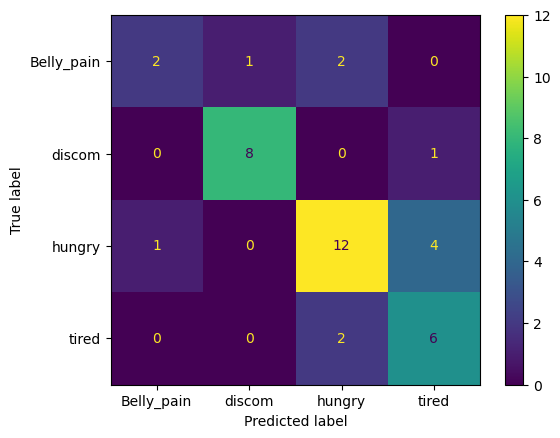

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)
y_pred = model.predict(x_test)